-   Cделать не менее 5 визуализаций
    разного типа с фильтрацией и преобразованием данных разной сложности

-   Составить список вопросов, по которым хотелось бы получить ответ в
    виде графиков (и расширять этот список вопросов в процессе
    выполнения задания)
-   Построить соответствующие визуализации

# Описание

Целью данной подзадачи является исследование выборки фильмов полученных с портала IMDB.

Выборка состоит из фильмов, название которых включает слово *sense* (чувство). Фильтрация по названию была выбрана с целью получение объема данных который будет приемлимо небольшие и при этом достаточные по условиям задания размеры, но при этом обладать приемлимой репрезентативностью.

## Импорт библиотек

In [46]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Подготовка данных

,Unnamed: 0,title,year,link,rating,votes,genre,runtime,count,genres
0,0,Шестое чувство,1999,/title/tt0167404/,8.1,841690,Drama,107.0,1,"Drama, Mystery, Thriller"


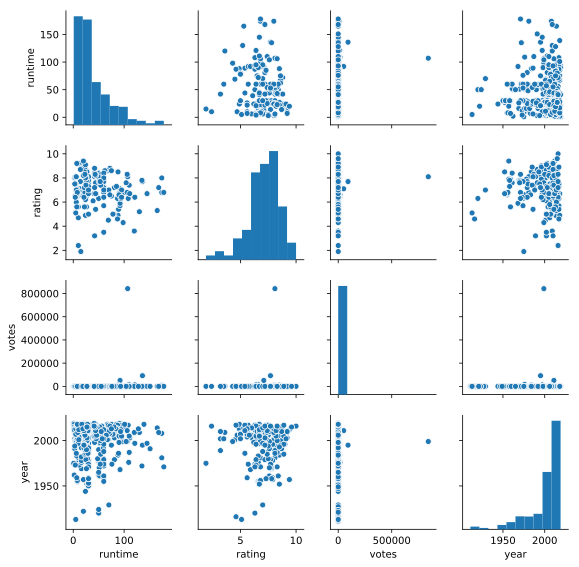

In [98]:
titles = pd.read_csv('imdb.csv')

titles['count'] = 1

titles = titles[titles['year'].isna() == False]
titles['year'] = titles['year'].str[:4]
titles = titles[titles['year'].str.match('[1-90][1-90][1-90][1-90]')]
titles['year'] = titles['year'].astype(int)

titles['genres'] = titles['genre']
titles['genre'] = titles['genres'].str.split(', ').str.get(0)

titles['runtime'] = titles['runtime'].str.split(' ').str.get(0)
titles['runtime'] = titles['runtime'].astype(float)

titles['votes'] = titles['votes'].fillna(-1)
titles['votes'] = titles['votes'].astype(int, errors='ignore')

sns.pairplot(titles[['runtime', 'rating', 'votes', 'year']], size=2)

Как изменяется средняя длина названия фильма с течением времени?

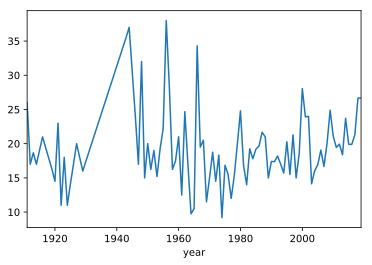

In [107]:
names = titles.copy()
names['length'] = names['title'].str.len()
year = names['year']
names.groupby('year').mean()['length'].reindex(range(year.min(), year.max()+1)).interpolate(method='spline', order=1).plot()

Какой долю каждый жанр занимает в общем зачете, учитывая, что фильм может принадлежать нескольким жанрам? 

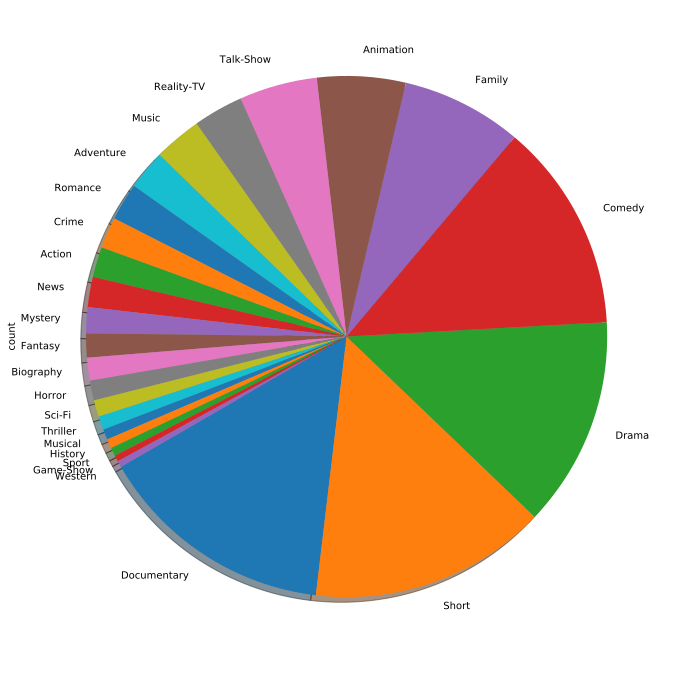

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

genres = pd.DataFrame({'name': titles['genres'].str.split(', ').apply(pd.Series).stack().reset_index(drop=True)})
genres['count'] = 1
genres_by_name = genres.groupby('name').sum().sort_values(by='count',ascending=False)
genres_by_name['count'].plot.pie(ax=ax, shadow=True, startangle=210)

Каким образом зависит средняя продолжительность фильма от его жанра?

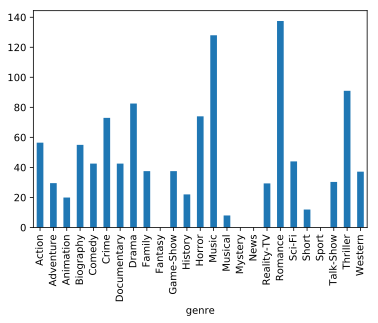

In [103]:
runtimes = titles.copy()
runtimes.groupby('genre').mean()['runtime'].plot.bar()

Какой вид имеет распределение по рейтингу за различные временные периоды?

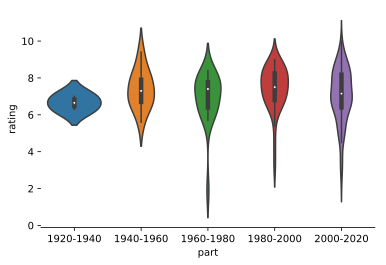

In [75]:
ratings = titles.copy()

ratings = ratings[ratings['rating'].notna()]

borders = np.arange(1920, 2040, 20)
parts = []
for start, end in zip(borders[:-1], borders[1:]):
    part = '{}-{}'.format(start, end)
    parts.append(part)
    ratings.loc[titles_.year.between(start, end), 'part'] = part

sns.violinplot(x='part', y='rating', order=parts, data=ratings)
sns.despine(left=True)

Как зависит количество проголовавших от года выхода и продолжтельности фильма?

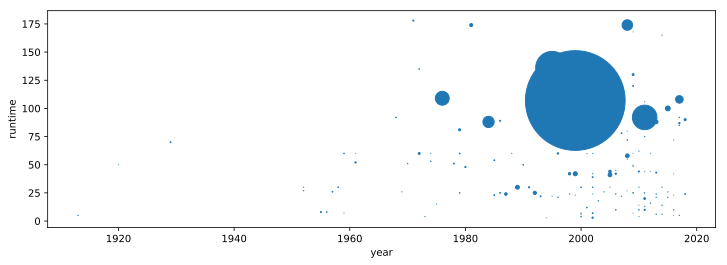

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))

votes = titles.dropna()
factor = 10000 *  1 / votes['votes'].max()
votes.plot.scatter('year', 'runtime', s=votes['votes'].mul(factor), ax=ax)